In [ ]:
#Anomaly Detection using Isolation Forest
'''
The Isolation Forest algorithm is an unsupervised machine learning method 
specifically designed for anomaly detection. Its core principle is that anomalies 
are "few and different" compared to normal data points, making them easier to isolate.
Isolation Trees:
The algorithm constructs an ensemble of isolation trees, which are essentially binary trees. 
For each tree:
It randomly selects a feature and a split point within the range of that feature.
The data is then partitioned into two subsets based on this split point.
This process is repeated recursively on each subset until data points are isolated or a 
maximum depth is reached.
'''


In [ ]:
'''
Real-World Applications
Finance: Detect unusual transactions to prevent fraud

Manufacturing: Flag defective products based on sensor data

Healthcare: Spot abnormal patient behavior in vitals or treatment

'''

In [3]:
#Use Case: Detect outliers in data like fraud or defects.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [4]:
# Generate data with outliers
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_combined = np.r_[X + 2, X - 2, X_outliers]

In [7]:
'''
Isolation Forest detects outliers by randomly selecting features and split values. 
Outliers tend to be isolated faster because they are few and different.

contamination tells the model what proportion of the dataset is expected to be outliers.
'''
# Fit model
model = IsolationForest(contamination=0.1, random_state=42)#Model
model.fit(X_combined)
#Prediction
y_pred = model.predict(X_combined)
#y_pred

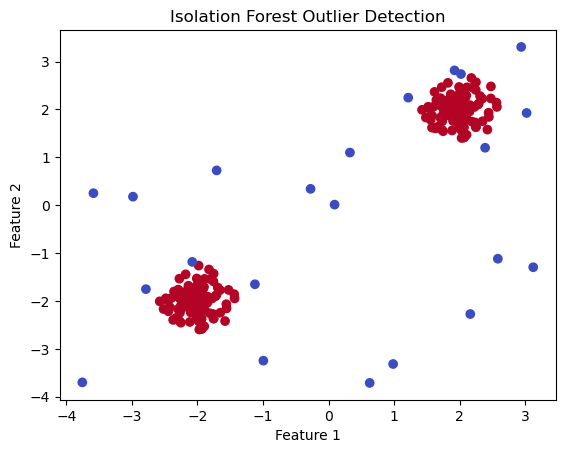

In [8]:
# Visualize
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_pred, cmap='coolwarm')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
#Fraud Detection with Isolation Forest (Unsupervised Learning)
#Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#Step 2: Generate a Synthetic Dataset
# Create a synthetic financial dataset with 'Amount' and 'TransactionTime'
rng = np.random.RandomState(42)

# Normal transactions
normal_data = rng.normal(loc=50, scale=10, size=(1000, 2))

# Fraudulent transactions (outliers)
outlier_data = rng.uniform(low=100, high=200, size=(50, 2))

# Combine the data
data = np.vstack([normal_data, outlier_data])
df = pd.DataFrame(data, columns=["Amount", "TransactionTime"])
#df

,Amount,TransactionTime
0,54.967142,48.617357
1,56.476885,65.230299
2,47.658466,47.658630
3,65.792128,57.674347
4,45.305256,55.425600
...,...,...
1045,195.077271,170.254050
1046,129.805221,110.536492
1047,178.182386,164.414922
1048,104.818601,136.005047


In [12]:
#Step 3: Apply Isolation Forest
# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df)

# Predict anomalies (-1 for outlier, 1 for normal)
df['anomaly'] = model.predict(df)


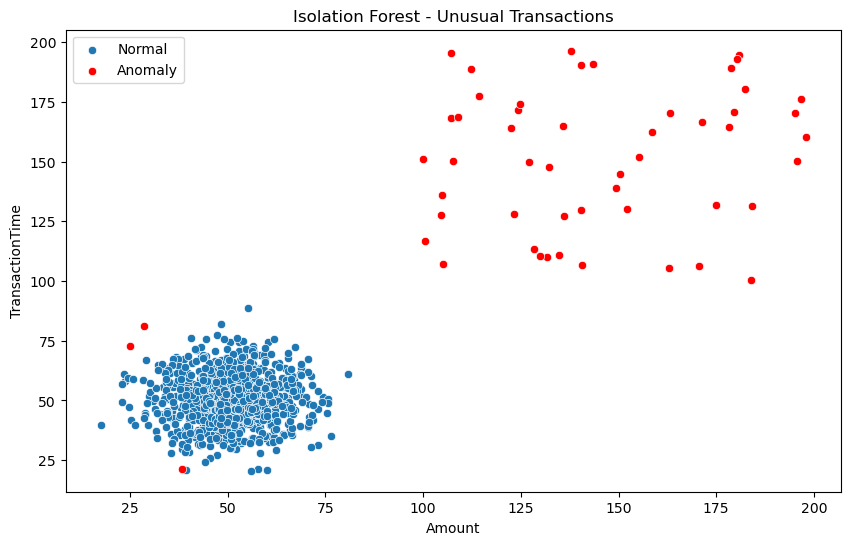

In [13]:
#Step 4: Visualize Anomalies
# Separate normal and anomalous transactions
normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Amount", y="TransactionTime", data=normal, label="Normal")
sns.scatterplot(x="Amount", y="TransactionTime", data=anomaly, color='red', label="Anomaly")
plt.title("Isolation Forest - Unusual Transactions")
plt.legend()
plt.show()
